In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [36]:
day = pd.read_csv('data/Bike Sharing Dataset/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
hour = pd.read_csv('data/Bike Sharing Dataset/hour.csv')
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


hour包含每一个天24小时的数据分布，day以天为单位包含两年的数据分布

包含日期信息（星期，是否是工作日，季节），天气信息（天气情况，风速，湿度，温度）

类别：临时用户使用量，注册用户使用量，总使用量

In [4]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


存在的数据中没有空值

小时数无法与总小时数匹配，说明出现了数据缺失

In [7]:
for item in day.columns:
    print(type(day[item][0]),item)

<class 'numpy.int64'> instant
<class 'str'> dteday
<class 'numpy.int64'> season
<class 'numpy.int64'> yr
<class 'numpy.int64'> mnth
<class 'numpy.int64'> holiday
<class 'numpy.int64'> weekday
<class 'numpy.int64'> workingday
<class 'numpy.int64'> weathersit
<class 'numpy.float64'> temp
<class 'numpy.float64'> atemp
<class 'numpy.float64'> hum
<class 'numpy.float64'> windspeed
<class 'numpy.int64'> casual
<class 'numpy.int64'> registered
<class 'numpy.int64'> cnt


### 数据处理统计

In [8]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

相关性说明天气和共享单车的使用量是存在一定的相关性的，寻找出规律性。

In [9]:
day.groupby('weathersit')['cnt'].sum() # 4 0 (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

In [10]:
day.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


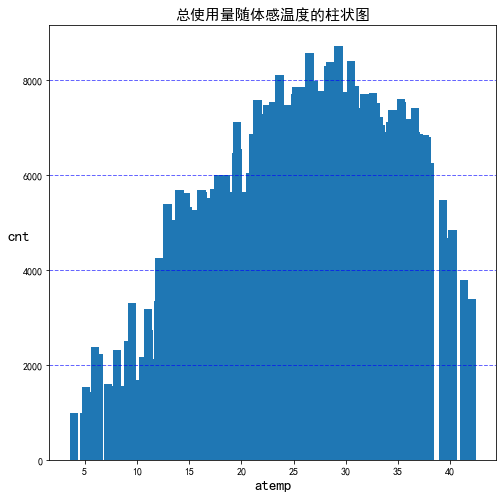

In [11]:
cnt_atemp = day.groupby('atemp')['cnt'].mean()
def bar_plot(df, xlabel, ylabel, title, multi_index=None):
    plt.figure(figsize=(8,8))
    if multi_index:
        plt.bar(df.index*multi_index, df.values, linewidth=1)
    else:
        plt.bar(df.index, df.values, linewidth=1)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15, rotation=0)
    plt.grid(color='blue',linestyle='--',linewidth=1,axis='y',alpha=0.6)
    plt.title(title, fontsize=15)
    plt.show()
bar_plot(cnt_atemp, "atemp", 'cnt', '总使用量随体感温度的柱状图', 50)

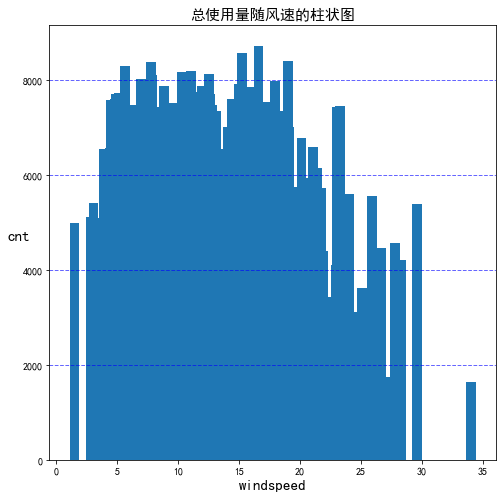

In [12]:
cnt_windspeed = day.groupby('windspeed')['cnt'].mean()
bar_plot(cnt_windspeed, "windspeed", 'cnt', '总使用量随风速的柱状图', 67)

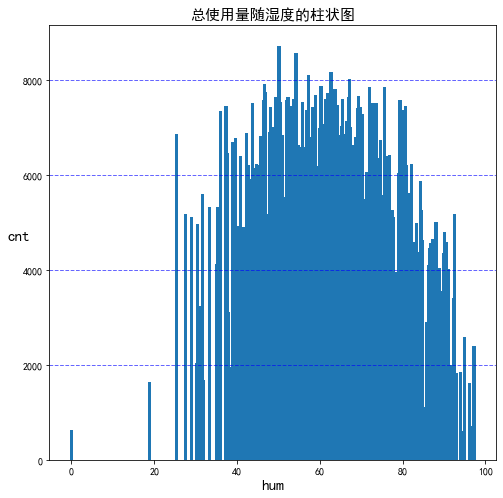

In [13]:
cnt_hum = day.groupby('hum')['cnt'].mean()
bar_plot(cnt_hum, "hum", 'cnt', '总使用量随湿度的柱状图', 100)

In [14]:
print(f'使用量最多的湿度值是:{cnt_hum.idxmax()*100}')
print(f'使用量最多的风速值是:{cnt_windspeed.idxmax()*67}')
print(f'使用量最多的体感温度值是:{cnt_atemp.idxmax()*50}')

使用量最多的湿度值是:50.1667
使用量最多的风速值是:16.583907
使用量最多的体感温度值是:29.29335


In [38]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Text(0, 0.5, 'number of riders per day')

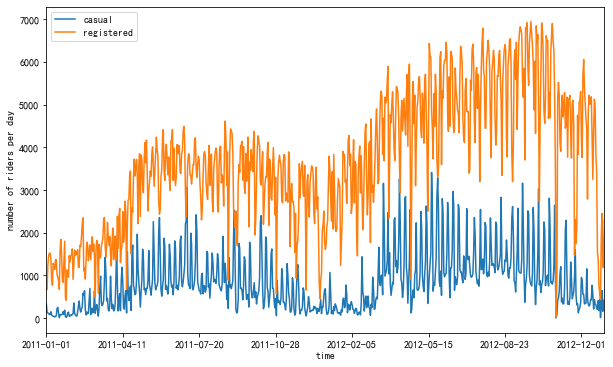

In [39]:
date_plot = day[['dteday','casual','registered']]
ax = date_plot.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("number of riders per day")

In [57]:
window = 7
rolling_means = date_plot.rolling(window).mean()
rolling_stds = date_plot.rolling(window).std()

Text(0, 0.5, 'number of rides per day')

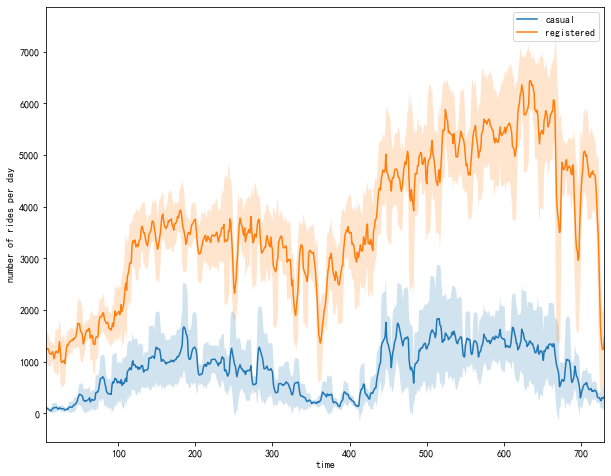

In [61]:
ax = rolling_means.plot(figsize=(10,8))
# ax.fill_between(rolling_means, rolling_means - rolling_stds, rolling_means + rolling_stds, 'r')
ax.fill_between(rolling_means.index, rolling_means['casual']-rolling_stds['casual'], rolling_means['casual']+rolling_stds['casual'], alpha=0.2)
ax.fill_between(rolling_means.index, rolling_means['registered']-rolling_stds['registered'], rolling_means['registered']+rolling_stds['registered'], alpha=0.2)
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")

In [18]:
weekday_mapping = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hour['weekday'] = hour['weekday'].apply(lambda x:weekday_mapping[x])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


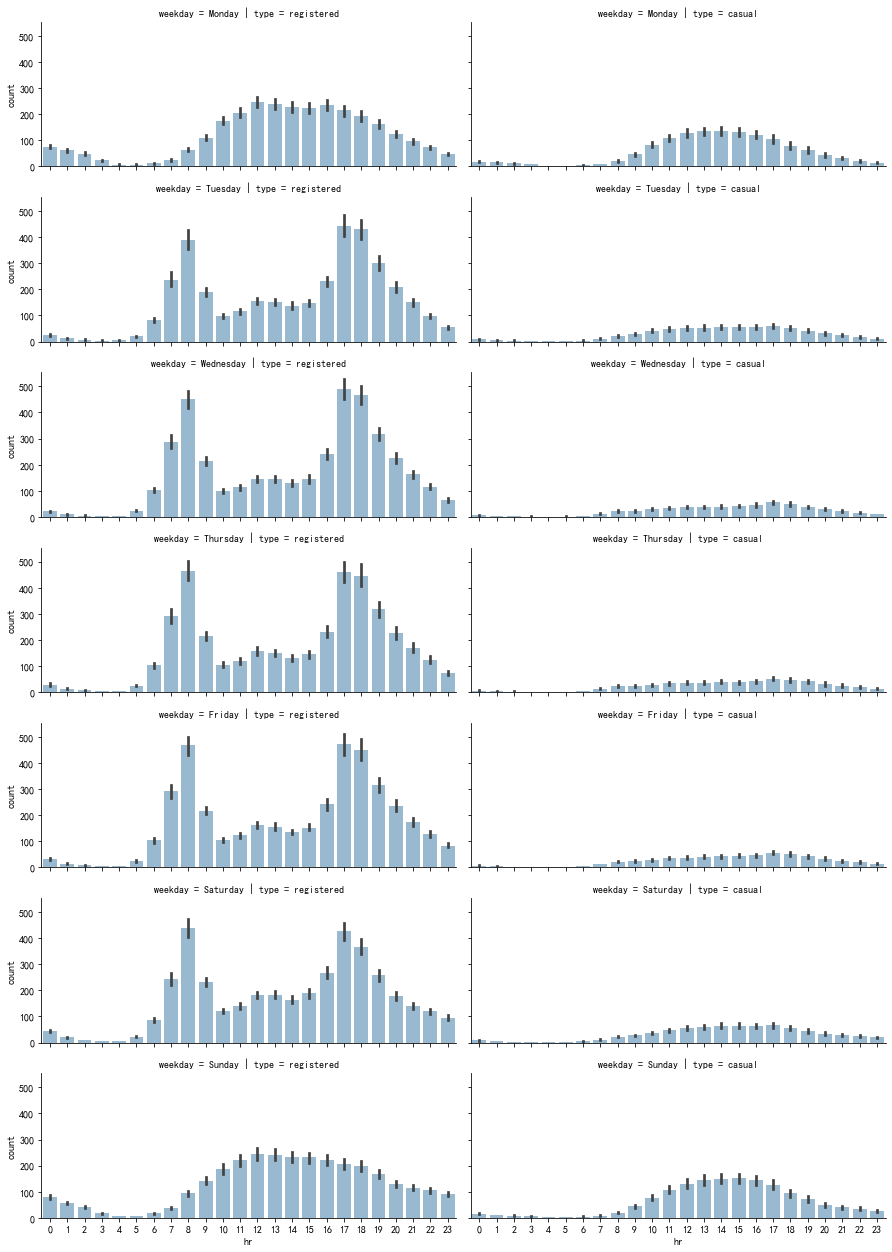

In [19]:
#骑行需求随一天不同小时，一周不同天的分布情况。
plot_data = hour[['hr','weekday','registered','casual']]
plot_data = plot_data.melt(id_vars=['hr','weekday'], var_name='type', value_name='count')
#将列名转换为列数据
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5,
              row_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

可以看出2012年比2011年的共享单车使用量高出了许多，其中年中的使用量大，年初、年末的使用量相对较小

一天之中，工作日时早上上班和下午下班时间的使用量最大，周末时则使用比较平均，使用量较工作日少，高峰出现的时间也更晚。注册用户在双休日凌晨使用的多。随即用户在平时少，在双休日多。

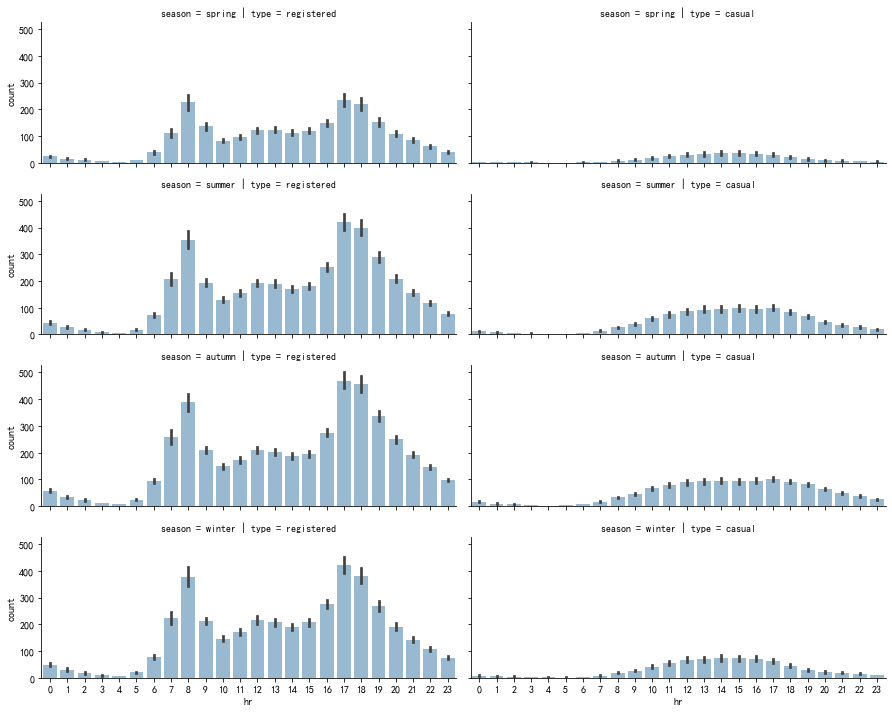

In [20]:
season_map = ['','spring','summer','autumn','winter']
hour['season'] = hour['season'].apply(lambda x: season_map[x])
plot_data = hour[['season','hr','registered','casual']]
plot_data = plot_data.melt(id_vars=['season','hr'], value_name='count', var_name='type')
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5)
grid.map(sns.barplot, 'hr', 'count', alpha=0.5) #barplot 需要x,y
# 夏季和秋季的使用量大，冬季注册用户不变，随即用户减少，春季使用量最少。

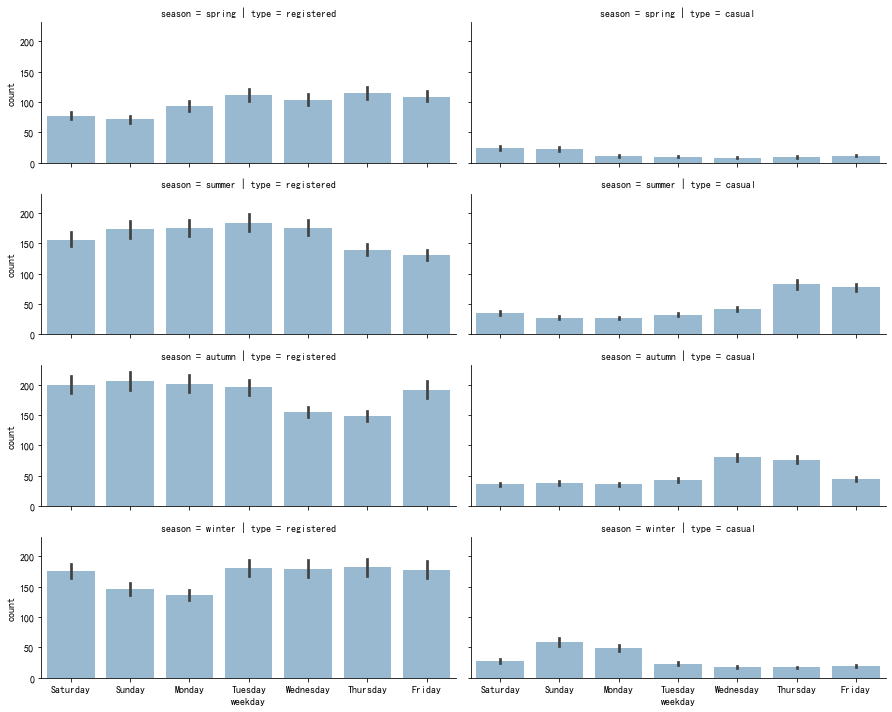

In [21]:
plot_data = hour[['weekday','season','registered','casual']]
plot_data = plot_data.melt(id_vars=['weekday','season'], var_name='type', value_name='count')
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5)
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5)

In [87]:
before = datetime.timedelta(days=-1)
after  = datetime.timedelta(days=1)


In [90]:
df = day.groupby('dteday')['cnt'].mean()
over_avg = df[df>df.mean()]
ans = []
for item in over_avg.items():
    # print(item[0], item[1])
    input = [int(item) for item in item[0].split('-')]
    aftertime = datetime.datetime(input[0],input[1],input[2])+after
    aft = f'{aftertime.year}-{aftertime.month:02d}-{aftertime.day:02d}'
    beforetime = datetime.datetime(input[0],input[1],input[2])+before
    bef = f'{beforetime.year}-{beforetime.month:02d}-{beforetime.day:02d}'
    if df[aft]*1.5 < item[1] and df[bef]*1.5 < item[1]:
        ans.append([item,df[bef],df[aft]])

ans

[[('2012-03-01', 4990), 1834, 3194]]

In [98]:
pretrained_data = hour.copy()
assert (pretrained_data['casual']+pretrained_data['registered'] == pretrained_data['cnt']).all(), 'not equal'

In [100]:
print(day.groupby('yr')['cnt'].sum())
print(day.groupby('mnth')['cnt'].sum())
date_cnt = day.groupby('dteday')['cnt'].mean()
print(date_cnt.values.mean()) #按天的平均值

yr
0    1243103
1    2049576
Name: cnt, dtype: int64
mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64
4504.3488372093025


Text(0.5, 1.0, 'ride Distribution')

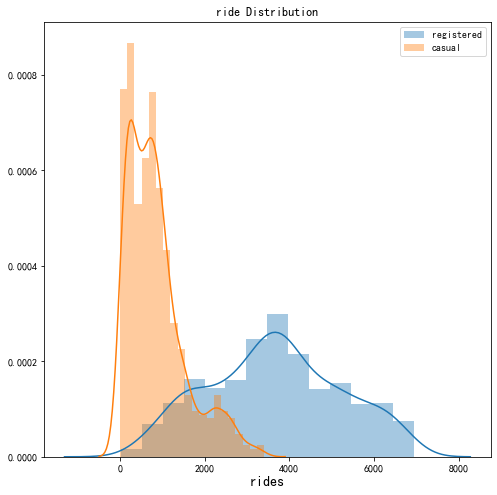

In [109]:
# 观察target label 的分布情况，day casual：正态分布
plt.figure(figsize=(8,8))
sns.distplot(day['registered'], label='registered') 
sns.distplot(day['casual'], label='casual')
plt.legend()
plt.xlabel('rides', fontsize=14)
plt.title('ride Distribution')

Text(0.5, 1.0, 'hour ride Distribution')

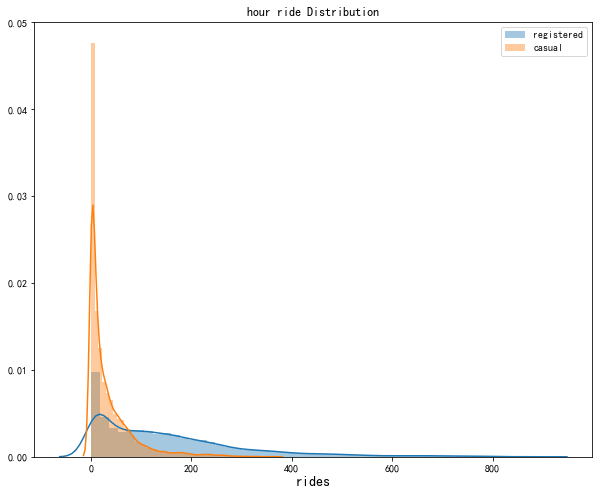

In [113]:
#小时的骑行数量差距很大
plt.figure(figsize=(10,8))
sns.distplot(hour['registered'], label='registered') 
sns.distplot(hour['casual'], label='casual')
plt.legend()
plt.xlabel('rides', fontsize=14)
plt.title('hour ride Distribution')

两个任务：

1. 回归预测

2. 异常事件检测

###  数据处理

In [16]:
''' 有str类型的特征时需要使用labelencoder和get_dummies 转化成int和one hot encoding编码
'''
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# decoded_sex = le.fit_transform(day['Sex'])
# decoded_age = le.fit_transform(data['Age'])
# decoded_city = le.fit_transform(data['CityType'])
# decoded_year_in = le.fit_transform(data['YearsInCity'])

# data['Sex'] = decoded_sex
# data['Age'] = decoded_age
# data['CityType'] = decoded_city
# data['YearsInCity'] = decoded_year_in

# data.drop(['ItemID'], axis=1, inplace=True)
# index = data['Married'].isnull() #是测试数据的index
# train_label = data[~index]['Married'] #训练的label
# data.drop(['Married'], axis=1, inplace=True)

# data.fillna(0, inplace = True)
# data = pd.get_dummies(data, columns=['ItemCategory1','ItemCategory2','ItemCategory3'])#对类别进行one-hot编码

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [123]:
day.drop(['dteday'], axis=1, inplace=True)
label1 = day['casual']
label2 = day['registered']
label3 = day['cnt']
day.drop(['casual'], axis=1, inplace=True)
day.drop(['registered'], axis=1, inplace=True)
day.drop(['cnt'], axis=1, inplace=True)
day.drop(['instant'], axis=1, inplace=True)
print(day.shape)

(731, 12)


In [126]:
pipline = Pipeline([
    ('scaler',StandardScaler()),
    ('lr', LogisticRegression(solver='lbfgs'))
])

In [145]:
from sklearn.model_selection import train_test_split
#分类问题
X_train,X_test,y_train,y_test = train_test_split(day, label3) #预测每天的共享单车总使用量 
pipline.fit(X_train, y_train)
pipline.score(X_test, y_test)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

nb_clf = GaussianNB() #先验为高斯分布的朴素贝叶斯
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0

In [136]:
X_train.shape, y_train.shape

((548, 11), (548,))

In [152]:
#回归问题
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [166]:
pipeline_reg = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])

In [167]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(mean_squared_error(pred, y_test))
lr.score(X_test, y_test)

609819.2425487384


0.8343702214920755

In [169]:
pipeline_reg.fit(X_train, y_train)
pipeline_reg.score(X_test, y_test)

0.8655684365244604

In [156]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
pred = dt_reg.predict(X_test)
mean_squared_error(pred, y_test)

772804.1967213114

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
predict = dt_clf.predict(X_test)
print('metrics of DesicionTreeClassifier:')
print(f'accuracy score:{accuracy_score(predict, y_test)}')
print(f'precision score:{precision_score(predict, y_test)}')
print(f'recall score:{recall_score(predict, y_test)}')
print(f'f1 score:{f1_score(predict, y_test)}')

predict = rf_clf.predict(X_test)
print('metrics of RandomForestClassifier:')
print(f'accuracy score:{accuracy_score(predict, y_test)}')
print(f'precision score:{precision_score(predict, y_test)}')
print(f'recall score:{recall_score(predict, y_test)}')
print(f'f1 score:{f1_score(predict, y_test)}')

metrics of DesicionTreeClassifier:
accuracy score:0.7768219735503561
precision score:0.7278906219306173
recall score:0.7319308641975308
f1 score:0.729905152121027
metrics of RandomForestClassifier:
accuracy score:0.7718657171922686
precision score:0.6789180057360625
recall score:0.7472971804186127
f1 score:0.711468390390514


## 调参

In [78]:

param_grid = {
    'n_estimators':np.linspace(7,13,7).astype(np.int8),
    'max_features': range(5,40),
    'max_depth': range(10,50)
}
grid_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, verbose=2)
%time grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)
print(grid_search.best_params_, grid_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=11, max_features=21, max_depth=41 ..................
[CV] ... n_estimators=11, max_features=21, max_depth=41, total=  10.9s
[CV] n_estimators=11, max_features=21, max_depth=41 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV] ... n_estimators=11, max_features=21, max_depth=41, total=  10.8s
[CV] n_estimators=11, max_features=21, max_depth=41 ..................
[CV] ... n_estimators=11, max_features=21, max_depth=41, total=  11.1s
[CV] n_estimators=13, max_features=22, max_depth=39 ..................
[CV] ... n_estimators=13, max_features=22, max_depth=39, total=  13.5s
[CV] n_estimators=13, max_features=22, max_depth=39 ..................
[CV] ... n_estimators=13, max_features=22, max_depth=39, total=  13.9s
[CV] n_estimators=13, max_features=22, max_depth=39 ..................
[CV] ... n_estimators=13, max_features=22, max_depth=39, total=  13.4s
[CV] n_estimators=10, max_features=31, max_depth=30 ..................
[CV] ... n_estimators=10, max_features=31, max_depth=30, total=  13.2s
[CV] n_estimators=10, max_features=31, max_depth=30 ..................
[CV] ... n_estimators=10, max_features=31, max_depth=30, total=  13.6s
[CV] n_estimators=10, max_features=31, max_depth=30 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.4min finished


Wall time: 6min 42s
{'n_estimators': 9, 'max_features': 32, 'max_depth': 17} 0.8135813923205886


In [76]:
param_grid = {
    'max_features': range(5,40),
    'max_depth': range(10,50)
}
grid_search = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, verbose=2)
%time grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_features=31, max_depth=19 ...................................
[CV] .................... max_features=31, max_depth=19, total=   1.8s
[CV] max_features=31, max_depth=19 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .................... max_features=31, max_depth=19, total=   1.9s
[CV] max_features=31, max_depth=19 ...................................
[CV] .................... max_features=31, max_depth=19, total=   1.9s
[CV] max_features=37, max_depth=40 ...................................
[CV] .................... max_features=37, max_depth=40, total=   2.5s
[CV] max_features=37, max_depth=40 ...................................
[CV] .................... max_features=37, max_depth=40, total=   2.4s
[CV] max_features=37, max_depth=40 ...................................
[CV] .................... max_features=37, max_depth=40, total=   2.5s
[CV] max_features=23, max_depth=17 ...................................
[CV] .................... max_features=23, max_depth=17, total=   1.4s
[CV] max_features=23, max_depth=17 ...................................
[CV] .................... max_features=23, max_depth=17, total=   1.5s
[CV] max_features=23, max_depth=17 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   49.8s finished


Wall time: 52.6 s


0.8034832146490336

In [77]:
grid_search.best_params_  #决策树的最佳超参数

{'max_features': 31, 'max_depth': 19}

In [72]:
dt_clf = DecisionTreeClassifier(max_features=34, max_depth=32)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=32,
                       max_features=34, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
#最终预测
rf_clf = grid_search.best_estimator_ #取出最好的模型
rf_clf.fit(train, label) #将所有数据放入训练
predict = rf_clf.predict(test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=17, max_features=32, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
pipeline_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'poly', 'reg', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'reg__copy_X', 'reg__fit_intercept', 'reg__n_jobs', 'reg__normalize'])

In [189]:
param_grid = [
    {
        'poly__degree': range(2,4)
    }
]
grid_search = GridSearchCV(pipeline_reg, param_grid=param_grid)
%time grid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 245 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8655684365244604

In [191]:
grid_search.best_params_

{'poly__degree': 2}

### 生成预测结果

In [116]:
predict.to_csv('submission.csv', index=False)

In [ ]:
#多次划分样本的方法,以及按相同的比例划分样本
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_idx, test_idx in s.split(train, train_label): #train_user_id, 
    X_train, y_train = train.iloc[train_idx], train_label.iloc[train_idx] #这个时候已经没有CustomerId了
    X_test,  y_test  = train.iloc[test_idx],  train_label.iloc[test_idx]

    dt_clf.fit(X_train, y_train)
    predict = dt_clf.predict(X_test)
    score = dt_clf.score(X_test, y_test)